In [147]:
import pandas as pd
import seaborn as sns
import os

In [148]:
HC_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/HC/small_worldness_comparison.csv'
ST01_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST01/small_worldness_comparison.csv'
ST02_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST02/small_worldness_comparison.csv'
ST03_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST03/small_worldness_comparison.csv'

output_save_path = '/Users/jk1/temp/stroke_resilience/output/figures'

In [149]:
HC_metrics = pd.read_csv(HC_path)
HC_metrics['timepoint_group'] = 'HC'

ST01_metrics = pd.read_csv(ST01_path)
ST01_metrics['timepoint_group'] = 'ST01'

ST02_metrics = pd.read_csv(ST02_path)
ST02_metrics['timepoint_group'] = 'ST02'

ST03_metrics = pd.read_csv(ST03_path)
ST03_metrics['timepoint_group'] = 'ST03'

all_groups_metrics = pd.concat([HC_metrics, ST01_metrics, ST02_metrics, ST03_metrics], ignore_index=True)

In [150]:
# Drop threshold < 0.3
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top0']
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top10']
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top20']


In [151]:
all_groups_metrics = all_groups_metrics.drop('subject', axis=1)

In [164]:
all_groups_metrics['non_normalized_smw'] = all_groups_metrics['mean_clustering_coefficient'].div(all_groups_metrics['mean_path_length'])

In [165]:
mean_metrics = all_groups_metrics.groupby(
    ['timepoint_group', 'threshold', 'graph_method', 'clustering_coefficient_type']
).mean()
mean_metrics

mean_path_length  \
timepoint_group threshold graph_method                         clustering_coefficient_type                           
HC              top100    Monte Carlo estimate of random graph WS clustering coefficient                  1.460773   
                                                               transitive clustering coefficient          1.460773   
                          analytical approximation             WS clustering coefficient                  1.460773   
                                                               transitive clustering coefficient          1.460773   
                top30     Monte Carlo estimate of random graph WS clustering coefficient                  1.715566   
...                                                                                                            ...   
ST03            top80     analytical approximation             transitive clustering coefficient          1.411752   
                top90     Monte Carlo estimate of random graph WS clustering coefficient                  1.411752   
                                                               transitive clustering coefficient          1.411752   
                          analytical approximation             WS clustering coefficient                  1.411752   
                                                               transitive clustering coefficient          1.411752   

                                                                                                  mean_clustering_coefficient  \
timepoint_group threshold graph_method                         clustering_coefficient_type                                      
HC              top100    Monte Carlo estimate of random graph WS clustering coefficient                             0.644730   
                                                               transitive clustering coefficient                     0.645535   
                          analytical approximation             WS clustering coefficient                             0.644730   
                                                               transitive clustering coefficient                     0.645535   
                top30     Monte Carlo estimate of random graph WS clustering coefficient                             0.517816   
...                                                                                                                       ...   
ST03            top80     analytical approximation             transitive clustering coefficient                     0.684506   
                top90     Monte Carlo estimate of random graph WS clustering coefficient                             0.684154   
                                                               transitive clustering coefficient                     0.684506   
                          analytical approximation             WS clustering coefficient                             0.684154   
                                                               transitive clustering coefficient                     0.684506   

                                                                                                  small_worldness_coefficient  \
timepoint_group threshold graph_method                         clustering_coefficient_type                                      
HC              top100    Monte Carlo estimate of random graph WS clustering coefficient                             1.191197   
                                                               transitive clustering coefficient                     1.192689   
                          analytical approximation             WS clustering coefficient                             0.921865   
                                                               transitive clustering coefficient                     0.922976   
                top30     Monte Carlo estimate of random graph WS clustering coefficient                       

In [166]:
# transform back into normal df
mean_metrics = mean_metrics.reset_index()

In [167]:
# sort thresholds
mean_metrics['sort'] = mean_metrics['threshold'].str.extract('(\d+)', expand=False).astype(int)
mean_metrics = mean_metrics.sort_values('sort', ascending=True)
# sort groups
mean_metrics = mean_metrics.sort_values(['timepoint_group', 'sort'], ascending=True)
mean_metrics = mean_metrics.drop('sort', axis=1)

In [155]:
mean_metrics.to_csv(os.path.join(output_save_path, 'mean_metrics.csv'))

Text(0.5, 1.03, 'mean_path_length')

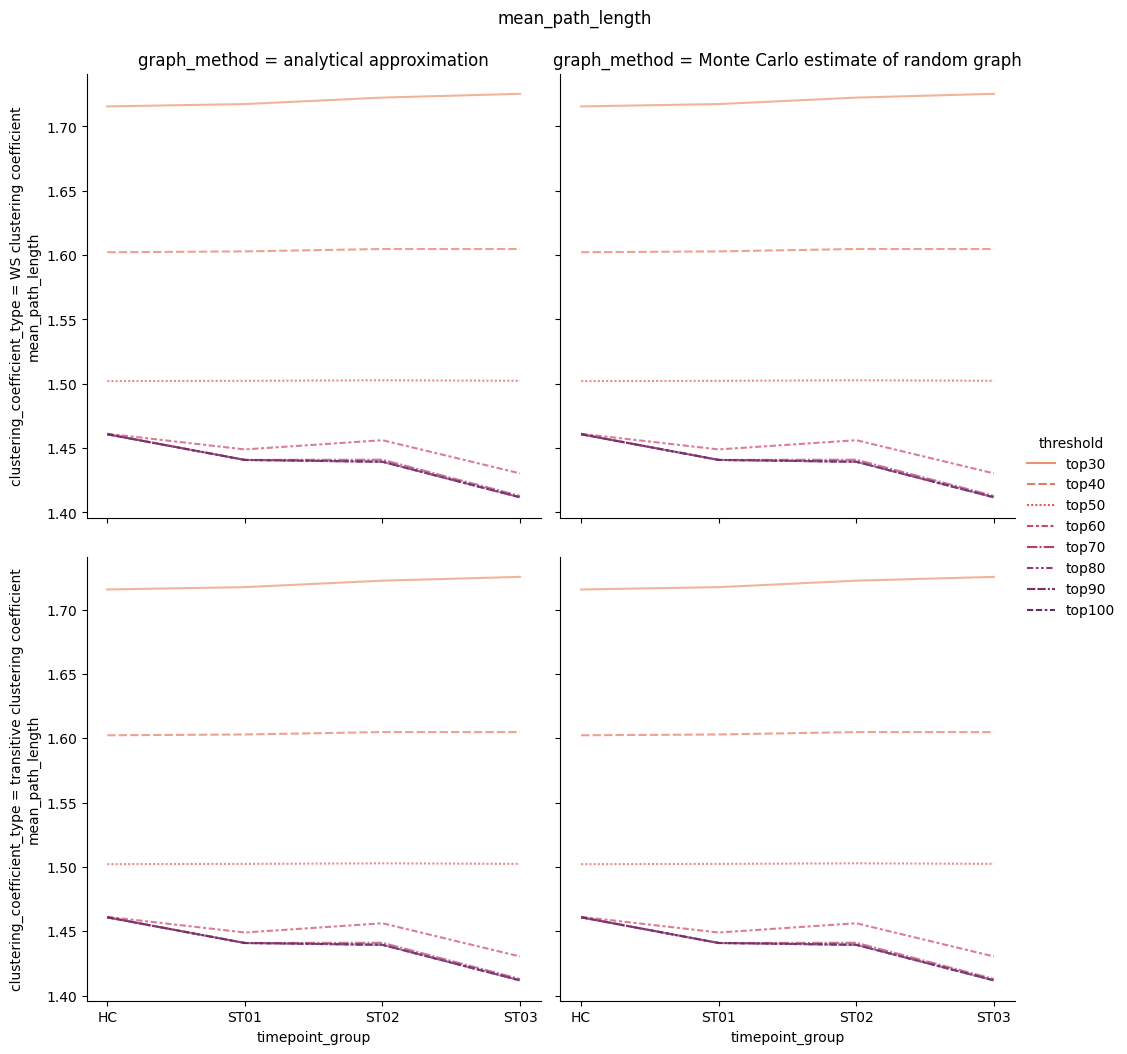

In [156]:
g = sns.relplot(data=mean_metrics, x='timepoint_group', y='mean_path_length', hue='threshold', style='threshold',
            col="graph_method", row="clustering_coefficient_type",
            alpha=.7, kind="line", palette='flare')

for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        row, col = axes_col.get_title().split('|')
        # axes_col.set_title(f'{col.strip()}\n{row.strip()}')
        if i == 0:
            axes_col.set_title(col.strip())
        else:
            axes_col.set_title('')

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel(row.strip() + '\n' + ylabel)
g.fig.suptitle("mean_path_length", y=1.03)

In [157]:
g.savefig(os.path.join(output_save_path, "mean_path_length.png"))


Text(0.5, 1.03, 'mean_clustering_coefficient')

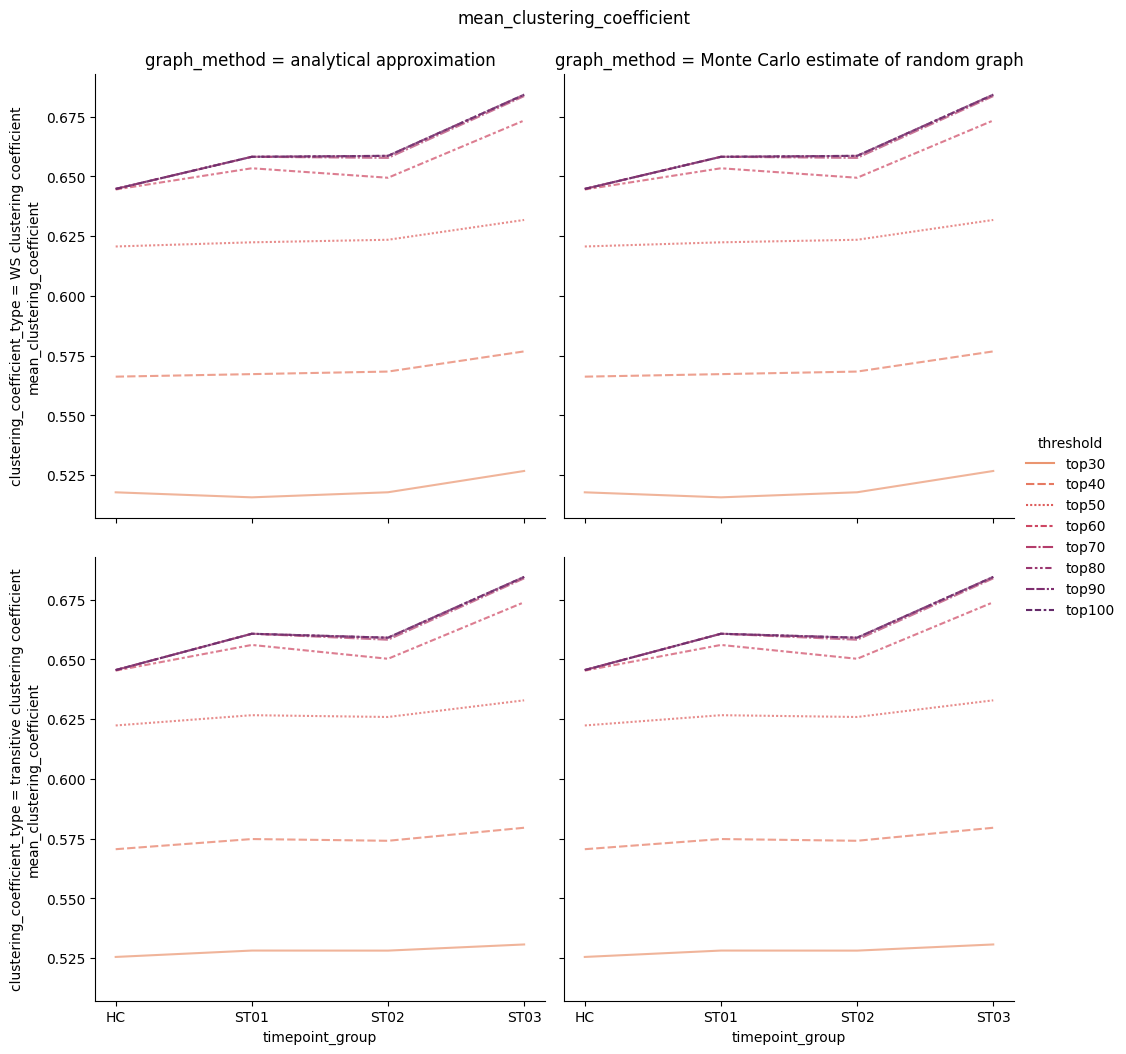

In [158]:
g = sns.relplot(data=mean_metrics, x='timepoint_group', y='mean_clustering_coefficient', hue='threshold', style='threshold',
            col="graph_method", row="clustering_coefficient_type",
            alpha=.7, kind="line", palette='flare')

for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        row, col = axes_col.get_title().split('|')
        # axes_col.set_title(f'{col.strip()}\n{row.strip()}')
        if i == 0:
            axes_col.set_title(col.strip())
        else:
            axes_col.set_title('')

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel(row.strip() + '\n' + ylabel)
g.fig.suptitle("mean_clustering_coefficient", y=1.03)


In [159]:
g.savefig(os.path.join(output_save_path, "mean_clustering_coefficient.png"))


Text(0.5, 1.03, 'small_worldness_coefficient')

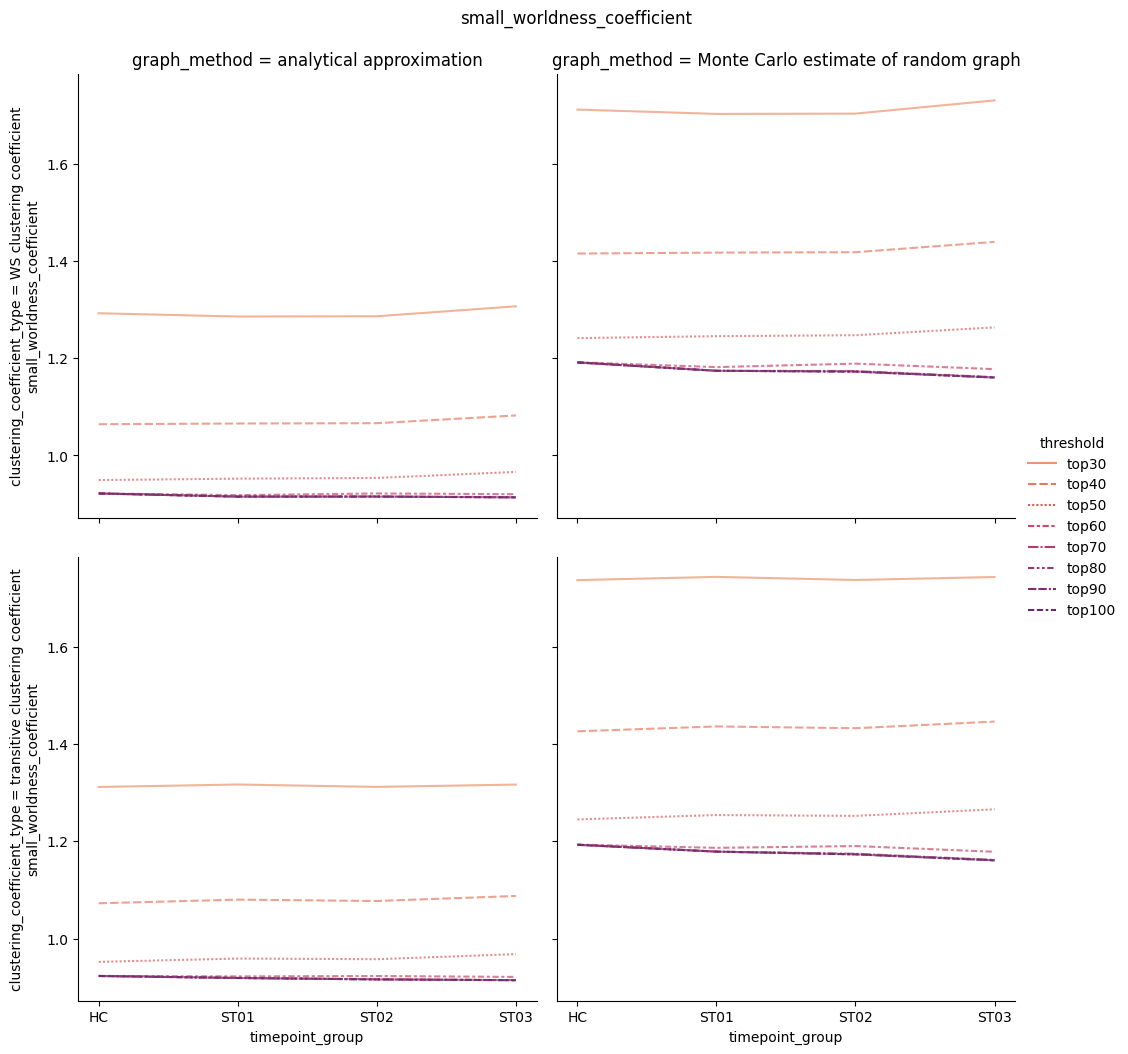

In [160]:
g = sns.relplot(data=mean_metrics, x='timepoint_group', y='small_worldness_coefficient', hue='threshold', style='threshold',
            col="graph_method", row="clustering_coefficient_type",
            alpha=.7, kind="line", palette='flare')

for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        row, col = axes_col.get_title().split('|')
        # axes_col.set_title(f'{col.strip()}\n{row.strip()}')
        if i == 0:
            axes_col.set_title(col.strip())
        else:
            axes_col.set_title('')

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel(row.strip() + '\n' + ylabel)
g.fig.suptitle("small_worldness_coefficient", y=1.03)

In [161]:
g.savefig(os.path.join(output_save_path, "small_worldness_coefficient.png"))


Text(0.5, 1.03, 'non_normalized_smw')

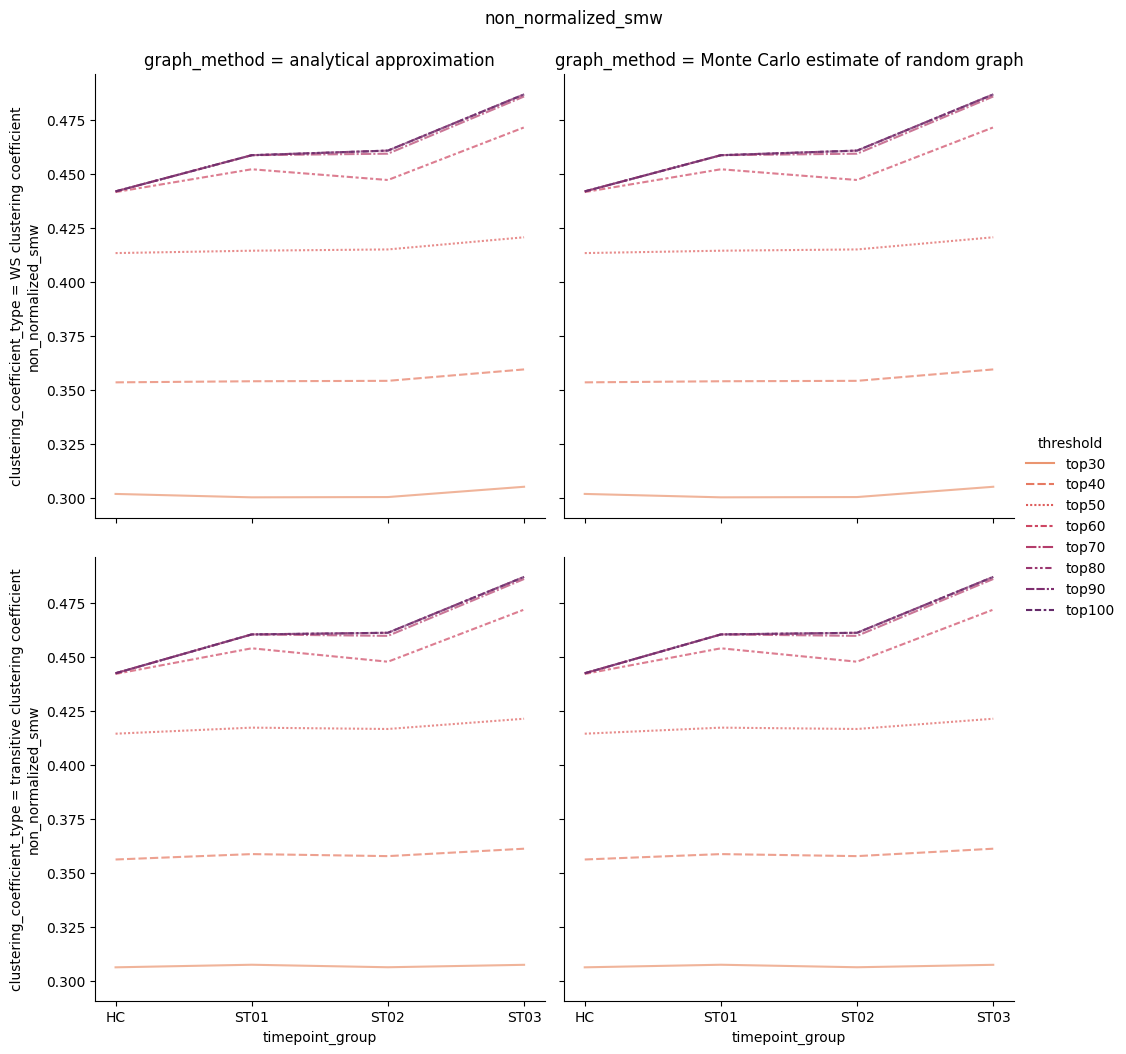

In [168]:
g = sns.relplot(data=mean_metrics, x='timepoint_group', y='non_normalized_smw', hue='threshold', style='threshold',
            col="graph_method", row="clustering_coefficient_type",
            alpha=.7, kind="line", palette='flare')

for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        row, col = axes_col.get_title().split('|')
        # axes_col.set_title(f'{col.strip()}\n{row.strip()}')
        if i == 0:
            axes_col.set_title(col.strip())
        else:
            axes_col.set_title('')

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel(row.strip() + '\n' + ylabel)
g.fig.suptitle("non_normalized_smw", y=1.03)